In [1]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display
from pandas.plotting import autocorrelation_plot
from matplotlib import ticker
from pathlib import Path

In [2]:
#path_to_defects = 'data\\Original data\\Run1\\run1_WM32_defects.csv' # расположение информации об аномалиях
#path_to_save_defects = 'data\\Prepared data\\Run1\\Y_data(binary_classification).xlsx' # куда сохранять Y часть выборки

path_to_defects = 'data\\Original data\\Run2\\run2_WM32_defects.csv' # расположение информации об аномалиях
path_to_save_defects = 'data\\Prepared data\\Run2\\Y_data(binary_classification).xlsx' # куда сохранять Y часть выборки

rows_number = 119
detectors_number = 400

In [3]:
def get_df(path: str):
    df = pd.read_csv(path, delimiter=';')
    return df

In [4]:
# чтение и вывод вида датафрейма с описанием дефектов (ненужные столбцы отсечены)
first_defects_df = get_df(path_to_defects)
first_defects_df = first_defects_df.loc[:,'row_min':'detector_max']
display(first_defects_df)

,row_min,row_max,detector_min,detector_max
0,21,27,7,11
1,21,27,377,381
2,21,27,0,3
3,22,28,370,374
4,22,28,15,19
5,23,26,360,362
6,24,30,393,397
7,24,30,385,389
8,26,28,26,27
9,47,53,10,13


In [5]:
# создание датафрейма определенного вида для записи в него показателей дефектов 
defects_df = pd.concat([pd.Series([0 for i in range(detectors_number)]) for i in range(rows_number)], 
        ignore_index=True, axis=1).T

defects_df.columns = [f'detector_{i}' for i in range(defects_df.shape[1])]

display(defects_df)

,detector_0,detector_1,detector_2,detector_3,detector_4,detector_5,detector_6,detector_7,detector_8,detector_9,...,detector_390,detector_391,detector_392,detector_393,detector_394,detector_395,detector_396,detector_397,detector_398,detector_399
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
def get_row_defects_dataframe(row_df, orig_df):
    temp_df = orig_df

    row_min = row_df.loc['row_min']
    row_max = row_df.loc['row_max'] + 1
    detector_min = row_df.loc['detector_min']   
    detector_max = row_df.loc['detector_max']     

    if (detector_min < detector_max):
        '''display(temp_df.iloc[row_min:row_max,detector_min:detector_max])'''
        result_df = temp_df.iloc[row_min:row_max,detector_min:detector_max+1]
    else:
        '''display(pd.concat(
            [temp_df.iloc[row_min:row_max,:detector_max],
             temp_df.iloc[row_min:row_max,detector_min:]], axis=1))'''
        result_df = pd.concat(
            [temp_df.iloc[row_min:row_max,:detector_max+1],
             temp_df.iloc[row_min:row_max,detector_min:]], axis=1)
        
    result_df[:] = 1
    
    return result_df

In [7]:
for row_name in first_defects_df.index.values.tolist():
    #print(row_name)
    temp_df = get_row_defects_dataframe(first_defects_df.loc[row_name], defects_df)
    
    # наложить один датафрейм на другой с учетом имен столбцов и индектов
    defects_df.loc[temp_df.index.values.tolist(),list(temp_df.columns)] = temp_df

defects_df.index.name = 'Row'
defects_df.to_numpy(dtype='bool')
display(defects_df)

,detector_0,detector_1,detector_2,detector_3,detector_4,detector_5,detector_6,detector_7,detector_8,detector_9,...,detector_390,detector_391,detector_392,detector_393,detector_394,detector_395,detector_396,detector_397,detector_398,detector_399
Row,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


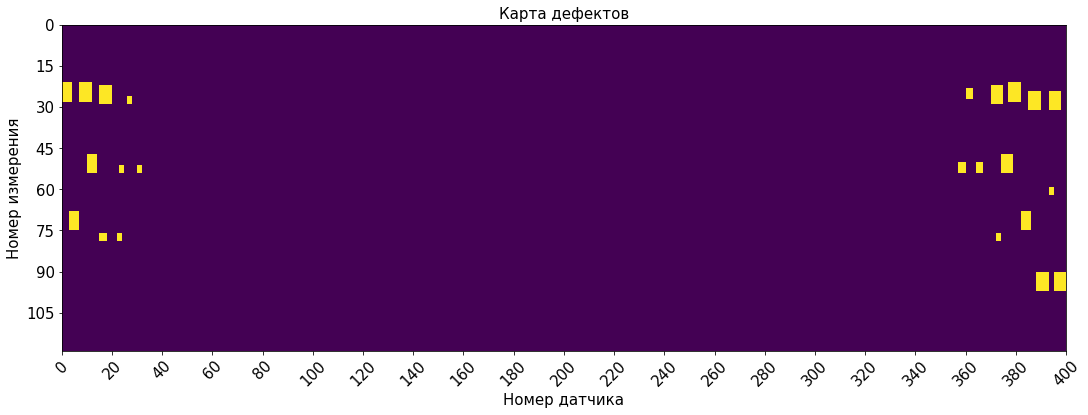

In [8]:
fig, ax = plt.subplots()

fig.set_figwidth(18)
fig.set_figheight(6)

ax.pcolormesh(defects_df)
ax.invert_yaxis()
ax.set_xlabel('Номер датчика', fontsize=15) 
ax.set_ylabel('Номер измерения', fontsize=15) 
ax.set_title('Карта дефектов', fontsize=15) 
 
#  Устанавливаем интервал основных делений: 
ax.xaxis.set_major_locator(ticker.MultipleLocator(20)) 
ax.yaxis.set_major_locator(ticker.MultipleLocator(15)) 
 
#  Устанавливаем форматирование чисел основных делений: 
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.d')) 
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.d')) 
 
#  Устанавливаем форматирование делений: 
ax.xaxis.set_tick_params(which = 'major', labelsize = 15, labelrotation = 45) 
ax.yaxis.set_tick_params(which = 'major', labelsize = 15) 
     

plt.show()

In [ ]:
defects_df.to_excel(path_to_save_defects)  